# Week 6
## Logistic Regression

Analytics Question:
Using the HR data set, Can we create a classification logistic regression model to predict the weather employee is quitting or not?  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

HR data set which consists of 10 input and 1 output features are used to determine whether an
employee will quit or not.<br><br>
This data set can be found in the link below:<br>
https://www.elsevier.com/books-and-journals/book-companion/9780128219294<br><br>
The input features are as follows:<br>
Late show up percentage, Project initiative percentage, Percentage of project delivery on time, Percentage of emails exchanged, Percentage of responsiveness, Percentage of professional email response, Percentage of sharing ideas, Percentage of helping colleagues, Percentage of entrepreneurial posts on LinkedIn, Percentage of Facebook comments.<br><br>
The output feature is called "Quitting" and is a binary class where 0 represents an employee staying and 1 representing an employee quitting.

In [2]:
df=pd.read_excel('Lecture6_HR_DataSet.xlsx')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Late show up percentage,1000.0,0.501025,0.187179,0.0,0.367040,0.495075,0.639074,1.0
Project initiative percentage,1000.0,0.483284,0.184640,0.0,0.359586,0.486289,0.622330,1.0
Percentage of project delivery on time,1000.0,0.427376,0.187881,0.0,0.286459,0.413932,0.552530,1.0
Percentage of emails exchanged,1000.0,0.400711,0.144444,0.0,0.295613,0.397399,0.496453,1.0
Percentage of responsiveness,1000.0,0.537204,0.182367,0.0,0.416221,0.539818,0.661523,1.0
Percentage of professional email response,1000.0,0.484969,0.182355,0.0,0.355052,0.483522,0.612790,1.0
Percentage of sharing ideas,1000.0,0.471185,0.179900,0.0,0.344950,0.458429,0.592071,1.0
Percentage of helping colleagues,1000.0,0.519861,0.194477,0.0,0.381461,0.515514,0.661990,1.0
Percentage of entrepreneurial posts on LinkedIn,1000.0,0.521589,0.193181,0.0,0.374331,0.526394,0.669513,1.0
Percentage of Facebook comments,1000.0,0.576462,0.162826,0.0,0.464761,0.586543,0.689762,1.0


C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

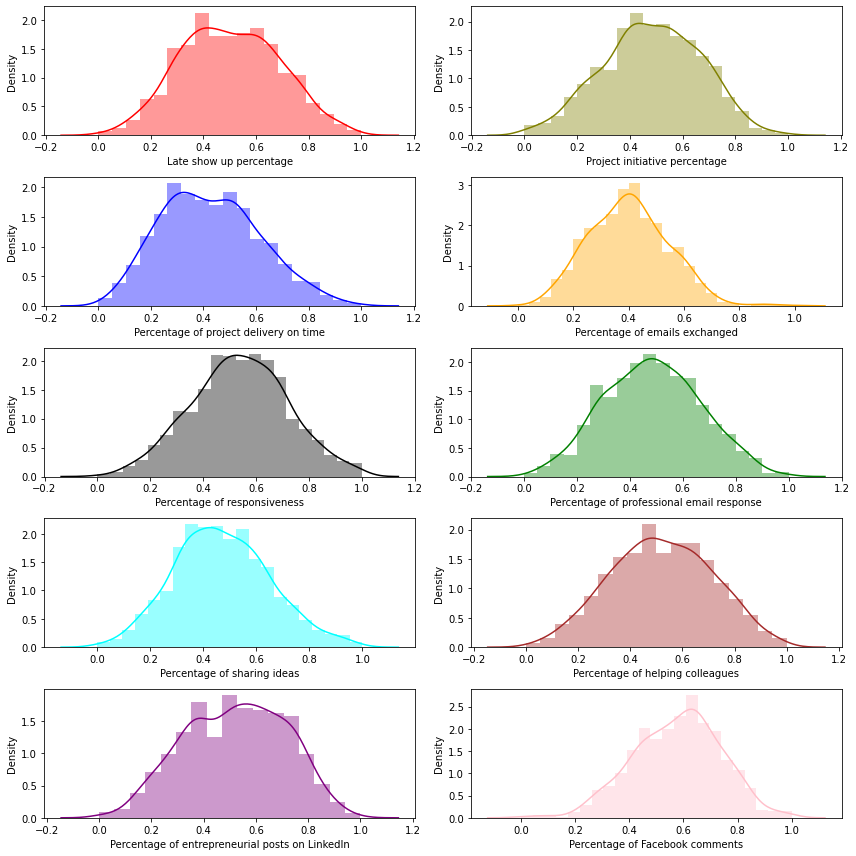

In [4]:
f, axes = plt.subplots(5, 2, figsize=(12, 12))
sns.distplot(df['Late show up percentage'] , color="red", ax=axes[0, 0])
sns.distplot(df['Project initiative percentage'] , color="olive", ax=axes[0, 1])
sns.distplot(df['Percentage of project delivery on time'] , color="blue", ax=axes[1, 0])
sns.distplot(df['Percentage of emails exchanged'] , color="orange", ax=axes[1, 1])
sns.distplot(df['Percentage of responsiveness'] , color="black", ax=axes[2, 0])
sns.distplot(df['Percentage of professional email response'] , color="green", ax=axes[2, 1])
sns.distplot(df['Percentage of sharing ideas'] , color="cyan", ax=axes[3, 0])
sns.distplot(df['Percentage of helping colleagues'] , color="brown", ax=axes[3, 1])
sns.distplot(df['Percentage of entrepreneurial posts on LinkedIn'] , color="purple", ax=axes[4, 0])
sns.distplot(df['Percentage of Facebook comments'] , color="pink", ax=axes[4, 1])
plt.tight_layout()

C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mibra\Anaconda3\lib\si

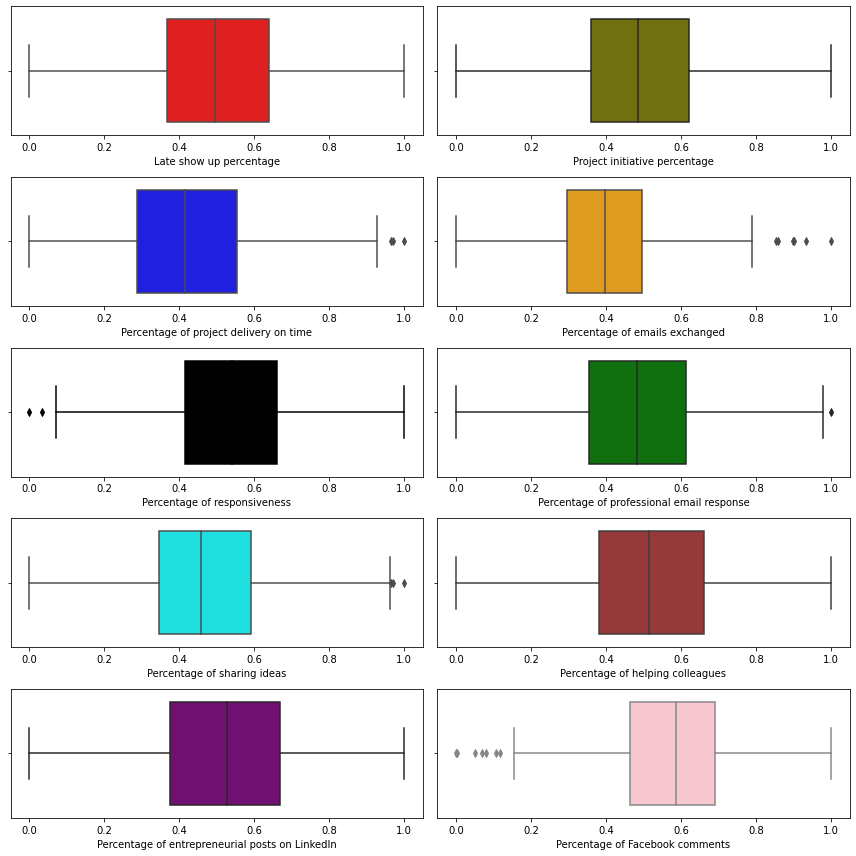

In [5]:
f, axes = plt.subplots(5, 2, figsize=(12, 12))
sns.boxplot(df['Late show up percentage'] , color="red", ax=axes[0, 0])
sns.boxplot(df['Project initiative percentage'] , color="olive", ax=axes[0, 1])
sns.boxplot(df['Percentage of project delivery on time'] , color="blue", ax=axes[1, 0])
sns.boxplot(df['Percentage of emails exchanged'] , color="orange", ax=axes[1, 1])
sns.boxplot(df['Percentage of responsiveness'] , color="black", ax=axes[2, 0])
sns.boxplot(df['Percentage of professional email response'] , color="green", ax=axes[2, 1])
sns.boxplot(df['Percentage of sharing ideas'] , color="cyan", ax=axes[3, 0])
sns.boxplot(df['Percentage of helping colleagues'] , color="brown", ax=axes[3, 1])
sns.boxplot(df['Percentage of entrepreneurial posts on LinkedIn'] , color="purple", ax=axes[4, 0])
sns.boxplot(df['Percentage of Facebook comments'] , color="pink", ax=axes[4, 1])
plt.tight_layout()

C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mibra\Anaconda3\lib\si

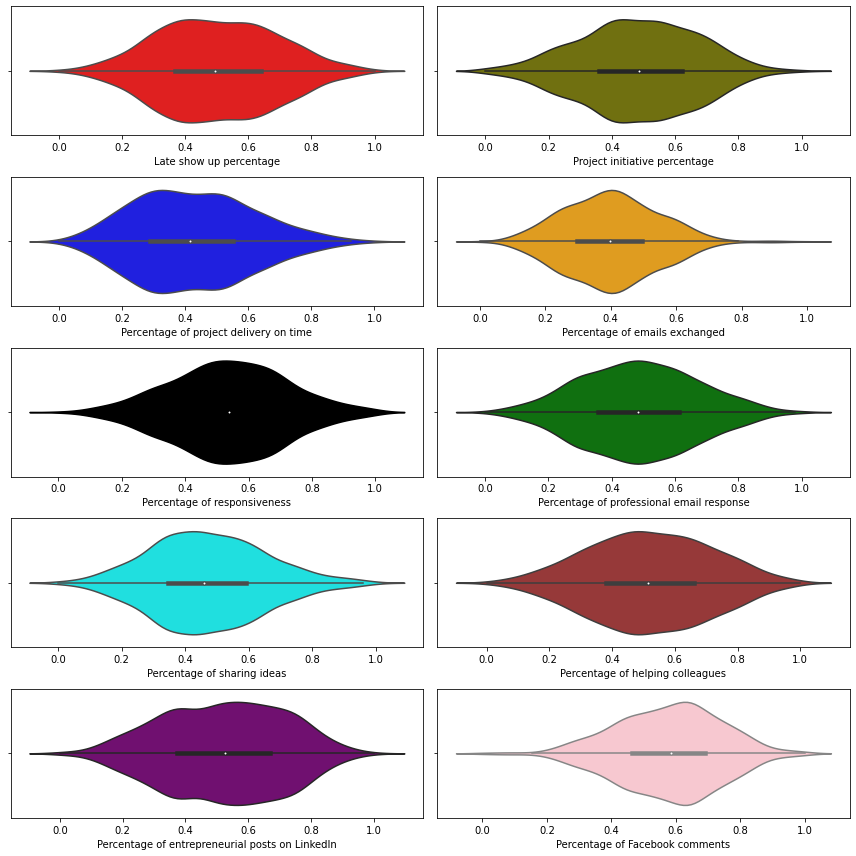

In [6]:
#Let’s plot the distribution and violin plots as follows:
f, axes = plt.subplots(5, 2, figsize=(12, 12))
sns.violinplot(df['Late show up percentage'] , color="red", ax=axes[0, 0])
sns.violinplot(df['Project initiative percentage'] , color="olive", ax=axes[0, 1])
sns.violinplot(df['Percentage of project delivery on time'] , color="blue", ax=axes[1, 0])
sns.violinplot(df['Percentage of emails exchanged'] , color="orange", ax=axes[1, 1])
sns.violinplot(df['Percentage of responsiveness'] , color="black", ax=axes[2, 0])
sns.violinplot(df['Percentage of professional email response'] , color="green", ax=axes[2, 1])
sns.violinplot(df['Percentage of sharing ideas'] , color="cyan", ax=axes[3, 0])
sns.violinplot(df['Percentage of helping colleagues'] , color="brown", ax=axes[3, 1])
sns.violinplot(df['Percentage of entrepreneurial posts on LinkedIn'] , color="purple", ax=axes[4, 0])
sns.violinplot(df['Percentage of Facebook comments'] , color="pink", ax=axes[4, 1])
plt.tight_layout()

As shown in distribution plots, all the input features appear to have normal
distributions and do not show any outliers.

<AxesSubplot:>

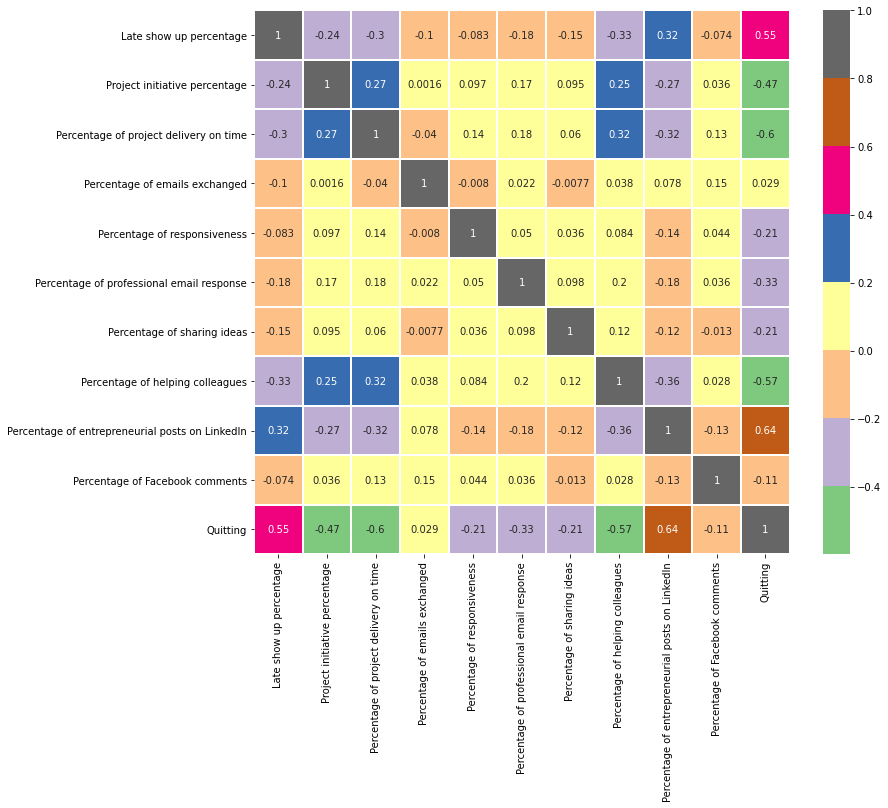

In [20]:
#let’s plot the Pearson correlation coefficient heat map as follows. 
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linecolor='white',linewidths=2, cmap= 'Accent')

There appears to be no collinear input features in this data set.

all parameters are already
between a scale of 0 and 1 and therefore, no normalization is necessary.

In [8]:
#let’s define x and y variables.
x_features=df.drop('Quitting',axis=1)
y=df['Quitting'] #output feature

# Train_Test_Split

In [9]:
seed= 50
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x_features,y, test_size=0.30)

In [10]:
len(X_train)

700

# Applying Logistic regression model

In [11]:
from sklearn.linear_model import LogisticRegression #import logistic regression library

In [12]:
np.random.seed(seed)
lr = LogisticRegression(penalty='l2', C=1.0,solver='lbfgs') #solver options that scikit-learn offers in logistic regression are "newton-cg," "lbfgs," "liblinear," "sag," "saga."

In [13]:
lr.fit(X_train,y_train)

LogisticRegression()

In [14]:
y_pred = lr.predict(X_test)

In [15]:
len(y_pred)

300

# Prediction and evaluation

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

[[143   9]
 [  4 144]]


<AxesSubplot:>

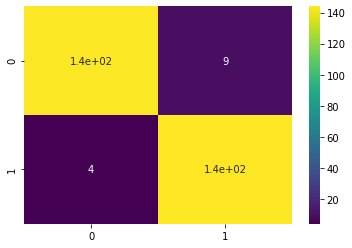

In [17]:
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='viridis')

143 instances (out of 152) were correctly
classified as class 0 (not quitting) and 9 were incorrectly classified under this
class. On the other hand, 144 instances (out of 148) were correctly classified as
class 1 (quitting) and only 4 instances were incorrectly classified.

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       152
           1       0.94      0.97      0.96       148

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



The overall accuracy of the model is 96%. <br>
The precision and recall percentage for each class are high and range from 94% to 97% with a
balanced class instances in each group.<br>
It is possible to improve the accuracy of this model by changing some of the fine-tuning parameters discussed either manually or using a grid search optimization (recommended approach).